# Data Science from Scratch intro

In [1]:
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"},
    
]

In [2]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

### Identify Key Connectors

#### Add a list of friends to each user

In [3]:
for i in users:
    i['Friends'] = []

In [4]:
for i, j in friendships:
    users[i]['Friends'].append(users[j]['name'])
    users[j]['Friends'].append(users[i]['name'])

In [5]:
users

[{'id': 0, 'name': 'Hero', 'Friends': ['Dunn', 'Sue']},
 {'id': 1, 'name': 'Dunn', 'Friends': ['Hero', 'Sue', 'Chi']},
 {'id': 2, 'name': 'Sue', 'Friends': ['Hero', 'Dunn', 'Chi']},
 {'id': 3, 'name': 'Chi', 'Friends': ['Dunn', 'Sue', 'Thor']},
 {'id': 4, 'name': 'Thor', 'Friends': ['Chi', 'Clive']},
 {'id': 5, 'name': 'Clive', 'Friends': ['Thor', 'Hicks', 'Devin']},
 {'id': 6, 'name': 'Hicks', 'Friends': ['Clive', 'Kate']},
 {'id': 7, 'name': 'Devin', 'Friends': ['Clive', 'Kate']},
 {'id': 8, 'name': 'Kate', 'Friends': ['Hicks', 'Devin', 'Klein']},
 {'id': 9, 'name': 'Klein', 'Friends': ['Kate']}]

#### Find total number of connections by summing lengths of all the friends lists

In [6]:
count = 0
for i in users:
    count += len(i['Friends'])
    
count

24

In [7]:
con = sum(len(i['Friends']) for i in users)
con

24

In [8]:
# Average number of connections
con / len(users)

2.4

#### Sort users by most friends to least friends

In [9]:
# create a list (user_id, num_friends)
num_friends_by_id = [(users[i]['id'], len(users[i]['Friends'])) for i, j in enumerate(users)]
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [10]:
# user num_friends_by_id to sort users
num_friends_by_id = sorted(num_friends_by_id,
                           key=lambda xy: xy[1],
                           reverse=True)

In [11]:
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [12]:
# Organize users using this new list we just made
# No clue how to do this right off the bat

### Data Scientists You May Know

In [13]:
import pandas as pd

In [14]:
users

[{'id': 0, 'name': 'Hero', 'Friends': ['Dunn', 'Sue']},
 {'id': 1, 'name': 'Dunn', 'Friends': ['Hero', 'Sue', 'Chi']},
 {'id': 2, 'name': 'Sue', 'Friends': ['Hero', 'Dunn', 'Chi']},
 {'id': 3, 'name': 'Chi', 'Friends': ['Dunn', 'Sue', 'Thor']},
 {'id': 4, 'name': 'Thor', 'Friends': ['Chi', 'Clive']},
 {'id': 5, 'name': 'Clive', 'Friends': ['Thor', 'Hicks', 'Devin']},
 {'id': 6, 'name': 'Hicks', 'Friends': ['Clive', 'Kate']},
 {'id': 7, 'name': 'Devin', 'Friends': ['Clive', 'Kate']},
 {'id': 8, 'name': 'Kate', 'Friends': ['Hicks', 'Devin', 'Klein']},
 {'id': 9, 'name': 'Klein', 'Friends': ['Kate']}]

In [15]:
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [16]:
hero = users[0]

In [17]:
# Make a function that produces a list of all friends of friends ids of a user
def friends_of_friend_ids_bad(user):
    # "foaf" is short for "friend of a friend"
    return [foaf["id"]
            for friend in user["friends"] # for each of user's friends
            for foaf in friend["friends"]] # get each of _their_ friends

In [18]:
from collections import Counter

def not_the_same(user, other_user):
    """ Check if users have different ids """
    pass

def not_friends(user, other_user):
    """ Check if users are not friends """
    pass
    
def friends_of_friends_ids(user):
    """ For each of user's friends, count their friends, if they aren't the same user and they aren't already friends. """
    pass

I have no idea how to get the above stuff working ... moving on!

## Interests

In [19]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [20]:
# Build a function that finds users with a certain interest
def data_scientists_who_like(target_interest):  # More lines, but easier to follow
    r = []
    for interest in interests:
        if interest[1] == target_interest:
            r.append(interest[0])
    return r

In [21]:
data_scientists_who_like('Python')

[2, 3, 5]

In [22]:
# Built the same function, but with a list comprehension
def comp_data_scientists_who_like(target_interest):  # Sick one-liner, bro
    return [usr_id[0] 
            for usr_id in interests 
            if usr_id[1] == target_interest]

In [23]:
comp_data_scientists_who_like('Python')

[2, 3, 5]

In [24]:
# Done gruss's way
def gruss_data_scientists_who_like(target_interest):
    return [user_id
           for user_id, user_interest in interests  # Because you can unpack a tuple within a list comprehension
           if user_interest == target_interest]

In [25]:
gruss_data_scientists_who_like('Python')  # This one is a bit more clear due to lack of indexing

[2, 3, 5]

## Build an index from interests to users, use that instead

In [26]:
from collections import defaultdict

In [27]:
interests

[(0, 'Hadoop'),
 (0, 'Big Data'),
 (0, 'HBase'),
 (0, 'Java'),
 (0, 'Spark'),
 (0, 'Storm'),
 (0, 'Cassandra'),
 (1, 'NoSQL'),
 (1, 'MongoDB'),
 (1, 'Cassandra'),
 (1, 'HBase'),
 (1, 'Postgres'),
 (2, 'Python'),
 (2, 'scikit-learn'),
 (2, 'scipy'),
 (2, 'numpy'),
 (2, 'statsmodels'),
 (2, 'pandas'),
 (3, 'R'),
 (3, 'Python'),
 (3, 'statistics'),
 (3, 'regression'),
 (3, 'probability'),
 (4, 'machine learning'),
 (4, 'regression'),
 (4, 'decision trees'),
 (4, 'libsvm'),
 (5, 'Python'),
 (5, 'R'),
 (5, 'Java'),
 (5, 'C++'),
 (5, 'Haskell'),
 (5, 'programming languages'),
 (6, 'statistics'),
 (6, 'probability'),
 (6, 'mathematics'),
 (6, 'theory'),
 (7, 'machine learning'),
 (7, 'scikit-learn'),
 (7, 'Mahout'),
 (7, 'neural networks'),
 (8, 'neural networks'),
 (8, 'deep learning'),
 (8, 'Big Data'),
 (8, 'artificial intelligence'),
 (9, 'Hadoop'),
 (9, 'Java'),
 (9, 'MapReduce'),
 (9, 'Big Data')]

In [28]:
users

[{'id': 0, 'name': 'Hero', 'Friends': ['Dunn', 'Sue']},
 {'id': 1, 'name': 'Dunn', 'Friends': ['Hero', 'Sue', 'Chi']},
 {'id': 2, 'name': 'Sue', 'Friends': ['Hero', 'Dunn', 'Chi']},
 {'id': 3, 'name': 'Chi', 'Friends': ['Dunn', 'Sue', 'Thor']},
 {'id': 4, 'name': 'Thor', 'Friends': ['Chi', 'Clive']},
 {'id': 5, 'name': 'Clive', 'Friends': ['Thor', 'Hicks', 'Devin']},
 {'id': 6, 'name': 'Hicks', 'Friends': ['Clive', 'Kate']},
 {'id': 7, 'name': 'Devin', 'Friends': ['Clive', 'Kate']},
 {'id': 8, 'name': 'Kate', 'Friends': ['Hicks', 'Devin', 'Klein']},
 {'id': 9, 'name': 'Klein', 'Friends': ['Kate']}]

In [29]:
# Keys are interests, values are lists of user_ids with that interest.
user_ids_by_interest = defaultdict(list,
                                   {interest: data_scientists_who_like(interest)
                                    for index, interest
                                    in interests}
           )

In [30]:
user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [33]:
# Keys are user_ids, values are lists of interests for that user_id
user_interests_by_id = defaultdict(list)
for scientist, interest in interests:
    user_interests_by_id[scientist].append(interest)

In [34]:
user_interests_by_id  # We now have a dictionary where keys are scientists, values are a list object of interests.

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

#### Interests in common

Find who has the most interests in common with a given user:
- Iterate over the user's interests
- For each interest, iterate over the other users with that interest
- Keep count of how many times we see each other user

In [36]:
for i in user_interests_by_id[0]:
    print(i)

Hadoop
Big Data
HBase
Java
Spark
Storm
Cassandra


In [39]:
# user should be an int
def interests_in_common(user):
    d = defaultdict(int)
    for i in user_interests_by_id[user]:  # For every interest a user has
        for j in user_ids_by_interest[i]: # Iterate over the users who have that interest
            d[j] += 1  # And add to the count of users who have that interest.
    return d

In [40]:
interests_in_common(0)

defaultdict(int, {0: 7, 9: 3, 8: 1, 1: 2, 5: 1})

In [59]:
# Doing it Joel Gruss's way, with Counter
def most_common_interests_with(user):
    return Counter(i
                   for i in user_interests_by_id[user]
                   for j in user_ids_by_interest[i]
                   if i != user)

In [60]:
most_common_interests_with(0)

Counter({'Hadoop': 2,
         'Big Data': 3,
         'HBase': 2,
         'Java': 3,
         'Spark': 1,
         'Storm': 1,
         'Cassandra': 2})

## Salaries and Experience

In [68]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [71]:
salaries = [i for i, j in salaries_and_tenures]
tenures = [j for i, j in salaries_and_tenures]

In [63]:
import matplotlib.pyplot as plt

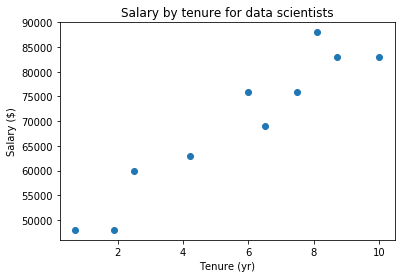

In [80]:
plt.scatter(tenures, salaries)
plt.xlabel('Tenure (yr)')
plt.ylabel('Salary ($)')
plt.title('Salary by tenure for data scientists');

In [81]:
# Look at average salary for each tenure
salaries_by_tenure = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    salaries_by_tenure[tenure].append(salary)

In [82]:
salaries_by_tenure

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

## Find the most popular interests by counting the words

In [83]:
interests

[(0, 'Hadoop'),
 (0, 'Big Data'),
 (0, 'HBase'),
 (0, 'Java'),
 (0, 'Spark'),
 (0, 'Storm'),
 (0, 'Cassandra'),
 (1, 'NoSQL'),
 (1, 'MongoDB'),
 (1, 'Cassandra'),
 (1, 'HBase'),
 (1, 'Postgres'),
 (2, 'Python'),
 (2, 'scikit-learn'),
 (2, 'scipy'),
 (2, 'numpy'),
 (2, 'statsmodels'),
 (2, 'pandas'),
 (3, 'R'),
 (3, 'Python'),
 (3, 'statistics'),
 (3, 'regression'),
 (3, 'probability'),
 (4, 'machine learning'),
 (4, 'regression'),
 (4, 'decision trees'),
 (4, 'libsvm'),
 (5, 'Python'),
 (5, 'R'),
 (5, 'Java'),
 (5, 'C++'),
 (5, 'Haskell'),
 (5, 'programming languages'),
 (6, 'statistics'),
 (6, 'probability'),
 (6, 'mathematics'),
 (6, 'theory'),
 (7, 'machine learning'),
 (7, 'scikit-learn'),
 (7, 'Mahout'),
 (7, 'neural networks'),
 (8, 'neural networks'),
 (8, 'deep learning'),
 (8, 'Big Data'),
 (8, 'artificial intelligence'),
 (9, 'Hadoop'),
 (9, 'Java'),
 (9, 'MapReduce'),
 (9, 'Big Data')]

- Lowercase each interest
- Split it into words
- Count the results

In [88]:
words_and_counts = Counter([k for i, j in interests for k in j.lower().split()])

In [89]:
words_and_counts

Counter({'hadoop': 2,
         'big': 3,
         'data': 3,
         'hbase': 2,
         'java': 3,
         'spark': 1,
         'storm': 1,
         'cassandra': 2,
         'nosql': 1,
         'mongodb': 1,
         'postgres': 1,
         'python': 3,
         'scikit-learn': 2,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'learning': 3,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'neural': 2,
         'networks': 2,
         'deep': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})